In [1]:
import numpy as np # numerical python
import pandas as pd # data processing
import matplotlib as plt2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns #statistical data visualization
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm 
import pylab as py 
from pandas import DataFrame


import warnings#ignore warnings
warnings.filterwarnings("ignore")


print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Matplotlib version:",plt2.__version__)
print("Seaborn version:",sns.__version__)

Pandas version: 1.1.3
Numpy version: 1.19.2
Matplotlib version: 3.3.4
Seaborn version: 0.11.0


In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("G6")
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())
print(train.info())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# KDE Plot

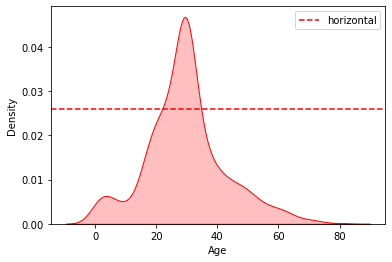

In [3]:
ax = sns.kdeplot(train["Age"], shade=True, color="red")
plt.axhline(y=0.026, c='red', linestyle='dashed', label="horizontal")
plt.legend()

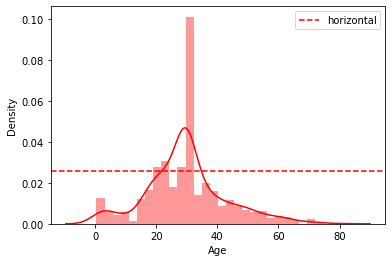

In [4]:
ax = sns.distplot(train["Age"], color="red")
plt.axhline(y=0.026, c='red', linestyle='dashed', label="horizontal")
plt.legend()

29.69911764705882


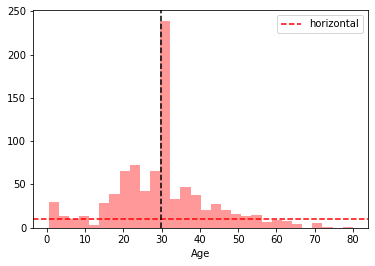

In [5]:
#KDE
ax = sns.distplot(train["Age"], color="red", kde=False)
plt.axhline(y=10.011236, c='red', linestyle='dashed', label="horizontal")
plt.legend()
plt.axvline(29.69911764705882, color="k", linestyle="--")
print(train["Age"].mean())

<AxesSubplot:xlabel='Age', ylabel='Density'>

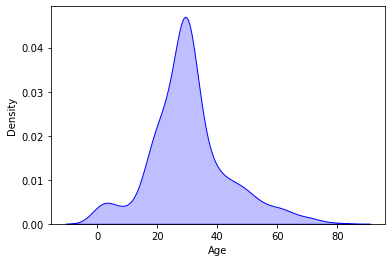

In [6]:
sns.kdeplot(train[train["Sex"]=="male"]["Age"], shade=True, color="blue")

This is very useful for exploring correlations between multidimensional data, 
when you'd like to plot all pairs of values against each other.
resource: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

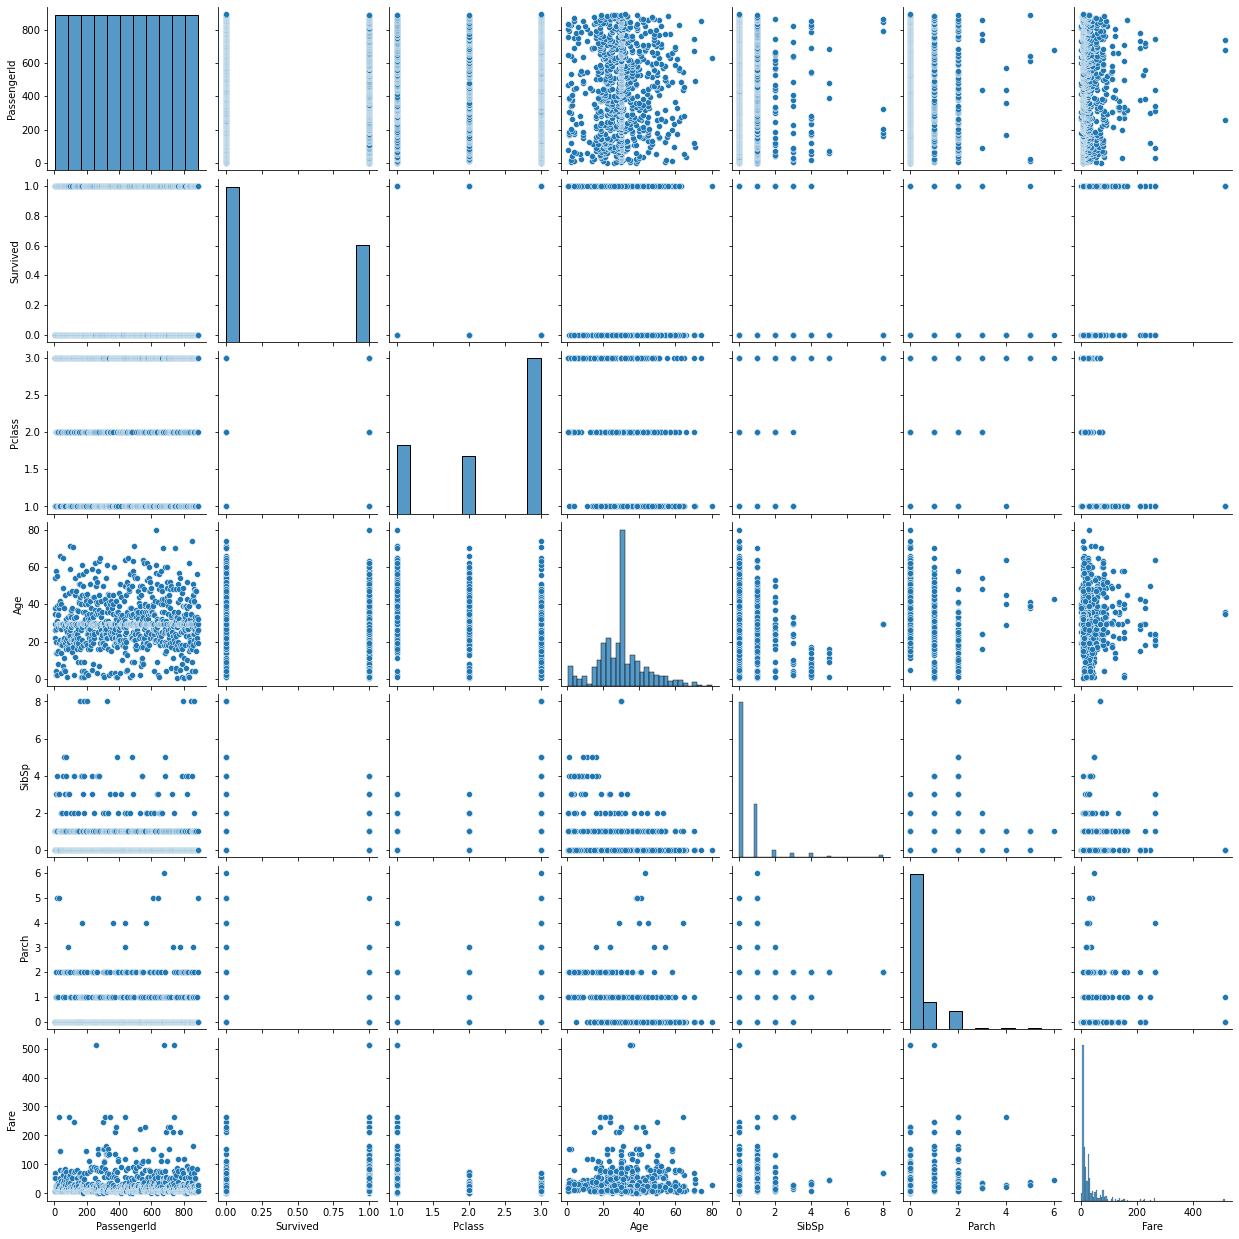

In [7]:
sns.pairplot(train,  size=2.5);

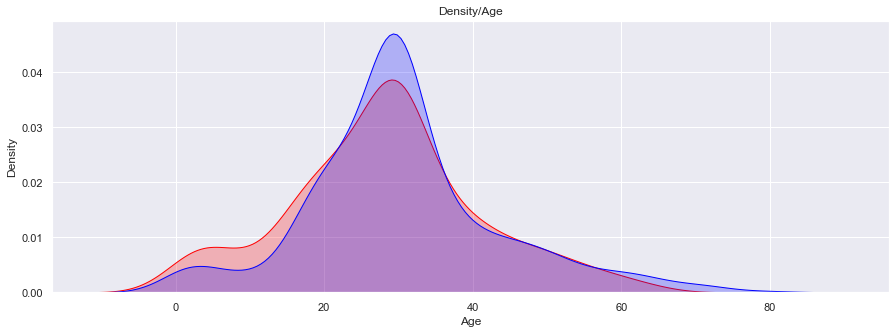

In [8]:
sns.set(rc={"figure.figsize":(15,5)})
x = sns.kdeplot(train[train["Sex"]=="female"]["Age"], shade=True, color="red")
x = sns.kdeplot(train[train["Sex"]=="male"]["Age"], shade=True, color="blue", Label="male")

plt.title("Density/Age")
plt.xlabel('Age')
plt.ylabel('Density')
fig = x.get_figure()
fig.savefig("images/Density_Age.png")

# Trendline

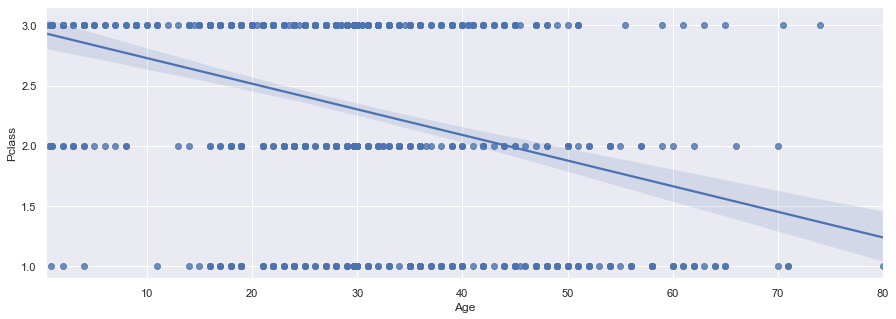

In [9]:
ax = sns.regplot(x="Age", y="Pclass", data=train)

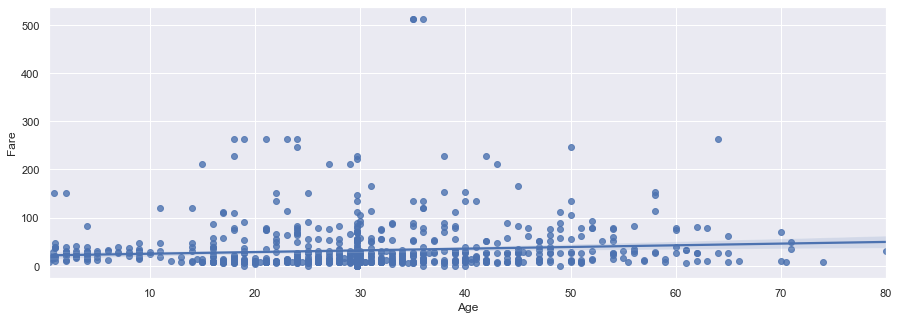

In [10]:
ax = sns.regplot(x="Age", y="Fare", data=train)

# Wordcloud

In [11]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re

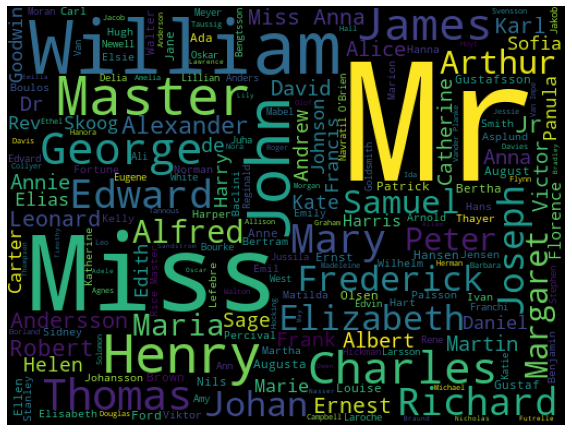

In [12]:
def plot_cloud2(wordcloud):
    #file = "data/output2.xlsx"#2.1 olunca sorunsuz çalışıyor
    #df = pd.read_excel(file)
    des = train["Name"]
    plt.subplots(figsize=(10,10))
    wordcloud = WordCloud(  
                              width=512,
                              height=384,
                             ).generate(" ".join(des))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
plot_cloud2(wordcloud)

resource: https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

# Day 19 
Visualization with wordcloud